In [53]:
import numpy as np
import pandas as pd

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
# O que este comando faz?

sns.set_style('whitegrid')

In [56]:
# o que o parse faz?

df_train = pd.read_csv('train.csv', nrows=200000, parse_dates=['pickup_datetime'])

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                300000 non-null  object             
 1   fare_amount        300000 non-null  float64            
 2   pickup_datetime    300000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   300000 non-null  float64            
 4   pickup_latitude    300000 non-null  float64            
 5   dropoff_longitude  299998 non-null  float64            
 6   dropoff_latitude   299998 non-null  float64            
 7   passenger_count    300000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 18.3+ MB


In [58]:
# O que o comando describe faz?

df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,300000.000000,300000.000000,300000.000000,299998.000000,299998.000000,300000.000000
mean,11.359876,-72.523230,39.928171,-72.529448,39.927360,1.684403
std,9.932815,11.325144,8.953498,10.914682,6.546706,1.309132
min,-44.900000,-740.000000,-3116.285383,-1329.621332,-1189.615440,0.000000
25%,6.000000,-73.992050,40.734985,-73.991350,40.734059,1.000000
50%,8.500000,-73.981762,40.752737,-73.980115,40.753185,1.000000
75%,12.500000,-73.967097,40.767108,-73.963565,40.768095,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [59]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

## Data Pre-processing

### Minimum Fare-Amount is Negative, so we have to remove this observations

In [60]:
len(df_train)

300000

In [61]:
df_train = df_train[df_train['fare_amount'] >= 0]

In [62]:
len(df_train)

299985

In [63]:
df_train[df_train['fare_amount'] > 0]['fare_amount']

0          4.5
1         16.9
2          5.7
3          7.7
4          5.3
          ... 
299995     4.5
299996     9.0
299997    11.0
299998     5.5
299999     6.0
Name: fare_amount, Length: 299977, dtype: float64

### Histogram of fare amount

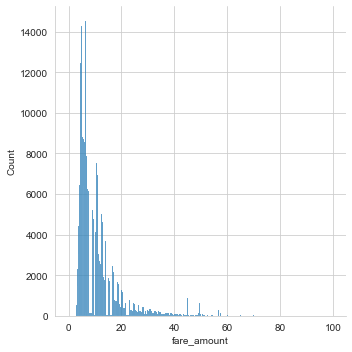

In [64]:
# para que usarmos um Histograma

sns.displot(df_train[df_train['fare_amount'] < 100]['fare_amount'], kde=False)

#### **Notice - small spikes between $40 and $60**

## Remove Missing Data

In [65]:
df_train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    2
dropoff_latitude     2
passenger_count      0
dtype: int64

In [66]:
# o que faz o comando how?

df_train = df_train.dropna(how='any', axis='rows')

In [67]:
len(df_train)

299983

In [68]:
df_test = pd.read_csv('test.csv')

In [69]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [70]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [71]:
latitude = 40.7141667
longitude = -74.0063889

### **NewYork City coordinates are [https://www.travelmath.com/cities/New+York,+NY](https://www.travelmath.com/cities/New+York,+NY)**

This will help us to make sure to train a model for the full pickup/dropoff co-ordinate range for the test set.

In [72]:
# O que é um bounding box?

### Minimum and Maximum Longitude Test set

In [73]:
# como é o retorno da função min()?

print(min(df_test['pickup_longitude'].min(), df_test['dropoff_longitude'].min()))

-74.263242


In [74]:
print(max(df_test['pickup_longitude'].max(), df_test['dropoff_longitude'].max()))

-72.986532


In [75]:
print(min(df_train['pickup_longitude'].min(), df_train['dropoff_longitude'].min()))

-1329.621332


In [76]:
print(max(df_train['pickup_longitude'].max(), df_train['dropoff_longitude'].max()))

2140.60116


### Minimum and Maximum Latitude Test set

In [77]:
print(min(df_test['pickup_latitude'].min(), df_test['pickup_latitude'].min()))

40.573143


In [78]:
print(max(df_test['pickup_latitude'].max(), df_test['pickup_latitude'].max()))

41.709555


In [79]:
print(min(df_train['pickup_latitude'].min(), df_train['pickup_latitude'].min()))

-3116.285383


In [80]:
print(max(df_train['pickup_latitude'].max(), df_train['pickup_latitude'].max()))

1703.092772


## Function for selecting the bounding box

In [81]:
def select_within_boundingbox(df, BB):
    return ((df["pickup_longitude"] >= BB[0]) & (df["pickup_longitude"] <= BB[1]) &
            (df["pickup_latitude"] >= BB[2]) & (df["pickup_latitude"] <= BB[3]) &
            (df["dropoff_longitude"] >= BB[0]) & (df["dropoff_longitude"] <= BB[1]) &
            (df["dropoff_latitude"] >= BB[2]) & (df["dropoff_latitude"] <= BB[3]))

### Load Image of NYC Map for Visualization

In [82]:
# por que usar estas localizações?

BB = (-74.3, -73.0, 40.6, 41.7)

In [83]:
nyc_map = plt.imread('NYC.png')

In [84]:
# indica que é uma imagem RGB
nyc_map.shape

(968, 952, 4)

In [85]:
nyc_map

array([[[0.05490196, 0.05490196, 0.05490196, 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        ...,
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ]],

       [[0.05490196, 0.05490196, 0.05490196, 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        ...,
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ]],

       [[0.05490196, 0.05490196, 0.05490196, 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        ...,
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.984313

In [86]:
# Com essa função somos capazes de tiras dados outliers, pois estavam muito fora do limite de NYC

df_train = df_train[select_within_boundingbox(df_train, BB)]

In [87]:
print("New size {}".format(len(df_train)))

New size 293447


### Function will be used for plotting data on NYC Map

In [88]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16, 10))
    axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha = alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=BB)

    axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"] , alpha = alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=BB)

### Plotting Training Data on map

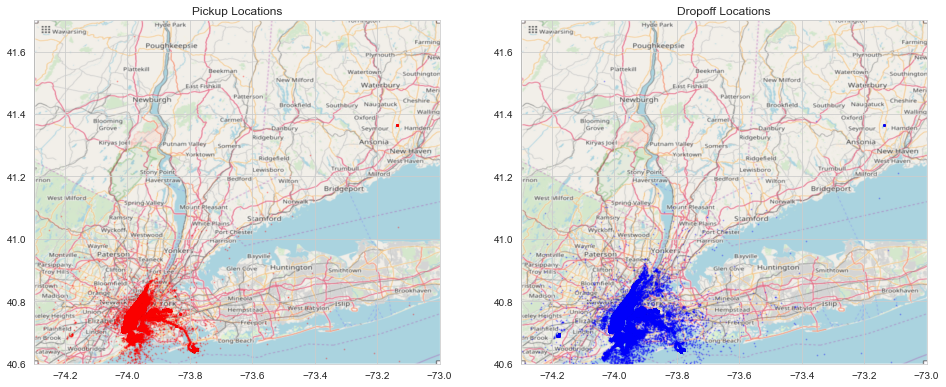

In [89]:
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.20)

  ### Plotting Testing Data on map

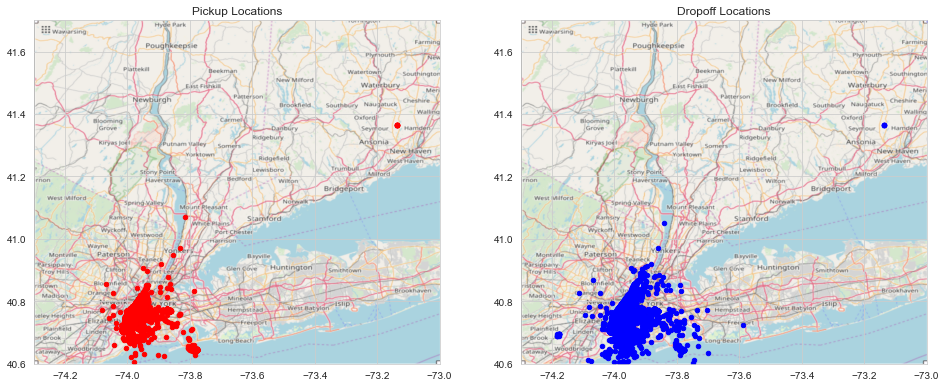

In [90]:
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=20)

## Scatter plot

In [91]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

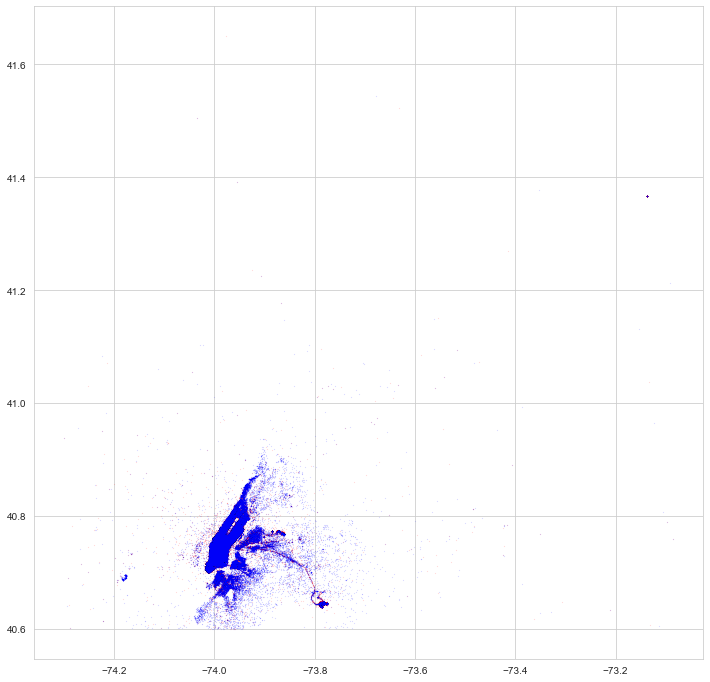

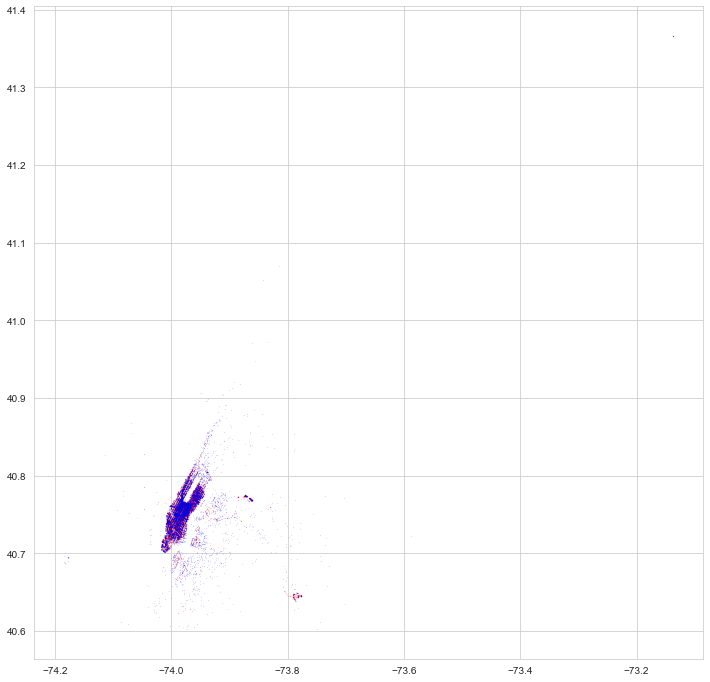

In [92]:
plot_hires(df_train, BB)
plot_hires(df_test, BB)

In [93]:
# add time information
df_train['year'] = df_train["pickup_datetime"].apply(lambda t: t.year)
df_train['weekday'] = df_train["pickup_datetime"].apply(lambda t: t.weekday)
df_train['hour'] = df_train["pickup_datetime"].apply(lambda  t: t.hour)

In [94]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7


### *Distance and Time Visualization*

1. **The longer the distance between pickup and dropoff locations, the higher the fare.**
2. **Some trips, like to/from an airport are fixed fee.**
3. **Fare at night is different from the day time.**


### Formula to be used for calculating the distance between latitude and longitude

In [95]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

### The longer the distance between pickup and dropoff location, higher the fare. Adding new column to dataframe with distance in miles

In [96]:
df_train['distance_miles'] = distance(df_train['pickup_latitude'], df_train['pickup_longitude'],
                                      df_test['dropoff_latitude'], df_train['dropoff_longitude'])

In [97]:
df_train['distance_miles'].head()

0    1.562150
1    2.724778
2    1.136257
3    1.298615
4    1.735822
Name: distance_miles, dtype: float64

Text(0.5, 1.0, 'Histogram ride distance in miles')

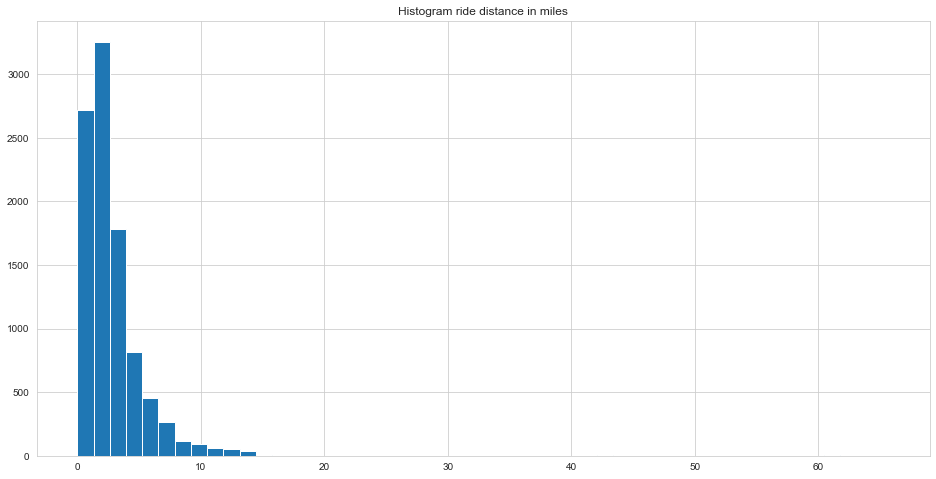

In [98]:
df_train['distance_miles'].hist(bins=50, figsize=(16, 8))
plt.title("Histogram ride distance in miles")

In [99]:
# o fato do minimo ser zero é um problema para nós
df_train["distance_miles"].describe()

count    9690.000000
mean        2.824033
std         2.973704
min         0.012526
25%         1.219922
50%         2.133246
75%         3.481006
max        65.708052
Name: distance_miles, dtype: float64

## It seems most rides are just short rides, with a small peak at ~13 miles. This peak could be due to airport drives.

In [100]:
df_train.groupby("passenger_count")['distance_miles', 'fare_amount'].mean()

C:\Users\thier\AppData\Local\Temp/ipykernel_792/518681074.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby("passenger_count")['distance_miles', 'fare_amount'].mean()


,distance_miles,fare_amount
passenger_count,,
0,3.397755,8.832353
1,2.802043,11.182403
2,2.952477,11.804886
3,2.784790,11.451802
4,2.750656,11.820035
5,2.836443,11.133157
6,2.669476,12.262599


## Scatter Plot distance vs Fare

Text(0.5, 1.0, 'Zoom in on distance < 15 mile and fare < $100')

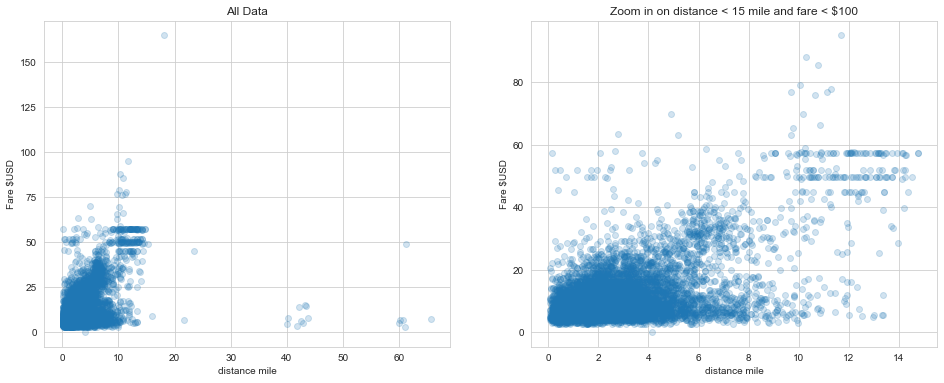

In [103]:
# O que é o comando scatter?

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].scatter(df_train["distance_miles"], df_train['fare_amount'], alpha=0.2)
axs[0].set_xlabel("distance mile")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")

# Zoom-in some part of the data
idx = ((df_train['distance_miles'] < 15) & (df_train["fare_amount"] < 100))
axs[1].scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_amount"], alpha=0.2)
axs[1].set_xlabel("distance mile")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom in on distance < 15 mile and fare < $100")

#### Few Obervations -

1. There are trips with zero distance but with a non-zero fare. Could this be trips from and to the same location? Predicting these fares will be difficult as there is likely not sufficient information in the dataset.
2. There are some trips with >50 miles travel distance but low fare. Perhaps these are discounted trips.
3. The horizontal lines in the right plot might indicate again the fixed fare trips to/from JFK airport. Overall there seems to be a (linear) relation between distance and fare with an average rate of +/- 100/20 = 5 $USD/mile

In [102]:
# remove datapoints with distance < 0.05 miles
idx = (df_train["distance_miles"] >= 0.05)
print('Old size: %d' % len(df_train))
df_train = df_train[idx]
print('New size: %d' % len(df_train))

Old size: 293447
New size: 9687


### *JKF airport coordinates, see JKF airport coordinates, see [https://www.travelmath.com/airport/JFK](https://www.travelmath.com/airport/JFK])*

In [104]:
jfk = (-73.7822222222,40.6441666667)
nyc = (-74.0063889, 40.7141667)

In [107]:
def plot_location_fare(loc, name, range=1.5):
    # select all datapoints with dropoff location within range of airport
    fig, axs = plt.subplots(1,2, figsize=(14,5))
    idx = (distance(df_train["pickup_latitude"], df_train["pickup_longitude"], loc[1], loc[0]) < range)
    df_train[idx]["fare_amount"].hist(bins = 100, ax=axs[0])
    axs[0].set_xlabel("Fare $USD")
    axs[0].set_title("Histogram pickup location within {} miles of {}".format(range, name))

    idx = (distance(df_train["dropoff_latitude"], df_train["dropoff_longitude"], loc[1], loc[0]) < range)
    df_train[idx]["fare_amount"].hist(bins=100, ax=axs[1])
    axs[1].set_xlabel("Fare $USD")
    axs[1].set_title("Histogram dropoff location within {} miles of {}".format(range, name))

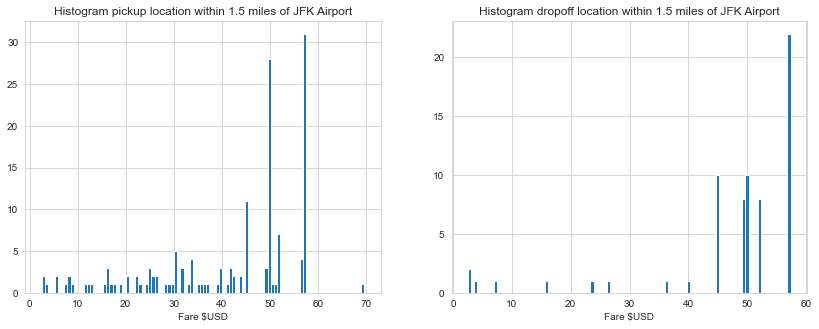

In [108]:
plot_location_fare(jfk, 'JFK Airport')

In [109]:
#Other Airports
ewr = (-74.175, 40.69) #Newark Liberty International Airport https://www.travelmath.com/airport/EWR
lgr = (-73.87, 40.77) #Laguardia Airport, https://www.travelmath.com/airport/LGA

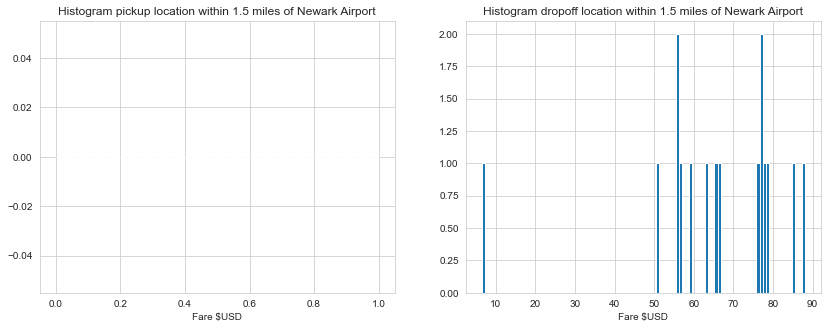

In [110]:
plot_location_fare(ewr, 'Newark Airport')

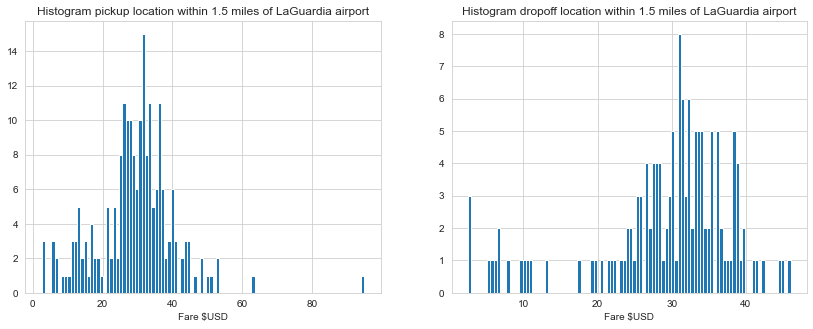

In [111]:
plot_location_fare(lgr, 'LaGuardia airport')

## Fare at night is different from the day time

In [112]:
df_train["fare_per_mile"] = df_train['fare_amount'] / df_train['distance_miles']

In [113]:
df_train['fare_per_mile'].describe()

count    9687.000000
mean        6.339228
std         9.652396
min         0.002416
25%         2.771402
50%         4.537408
75%         7.084766
max       390.422495
Name: fare_per_mile, dtype: float64

Text(0, 0.5, 'fare per distance in mile')

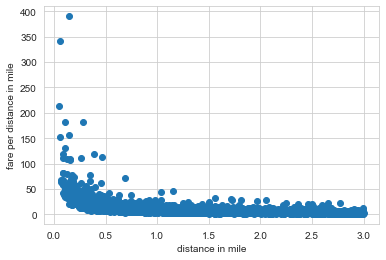

In [114]:
idx = (df_train['distance_miles'] < 3) & (df_train['fare_amount'] < 100)
plt.scatter(df_train[idx]['distance_miles'], df_train[idx]['fare_per_mile'])
plt.xlabel('distance in mile')
plt.ylabel('fare per distance in mile')

In [115]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,hour,distance_miles,fare_per_mile
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,1.562150,2.880645
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,2.724778,6.202340
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,1.136257,5.016471
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,1.298615,5.929395
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,1.735822,3.053308


Text(0, 0.5, 'Fare $USD / mile')

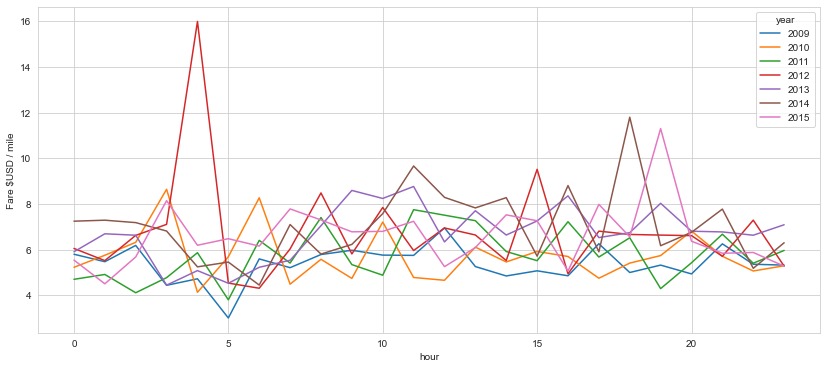

In [121]:
# como usar esse ppivot table?

df_train.pivot_table("fare_per_mile", index="hour", columns="year").plot(figsize=(14, 6))
plt.ylabel("Fare $USD / mile")

## Fare and Time Dependency Per Year

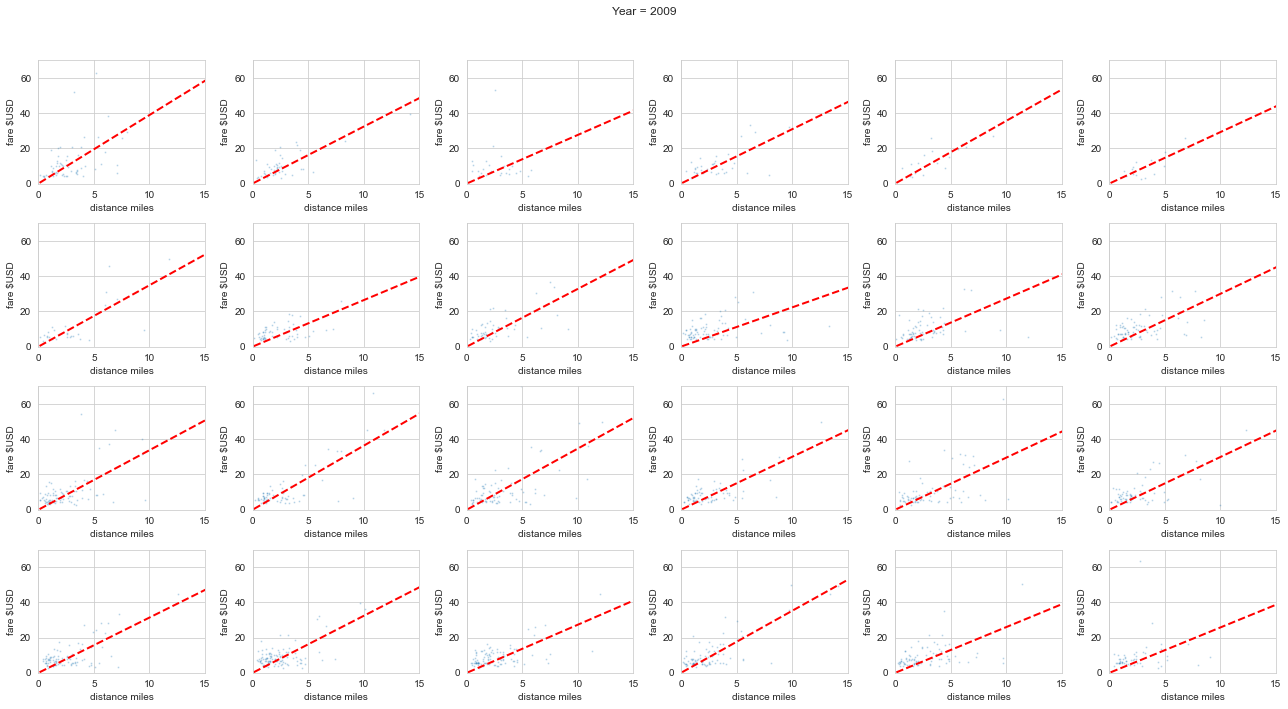

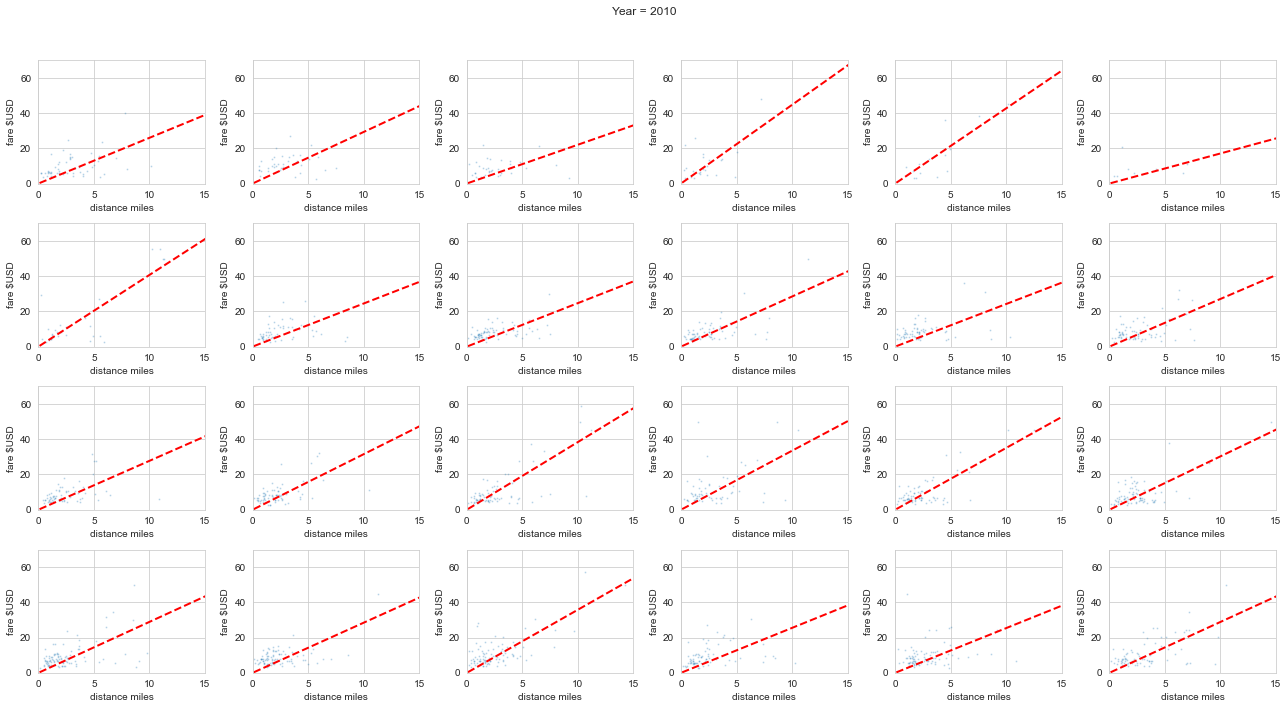

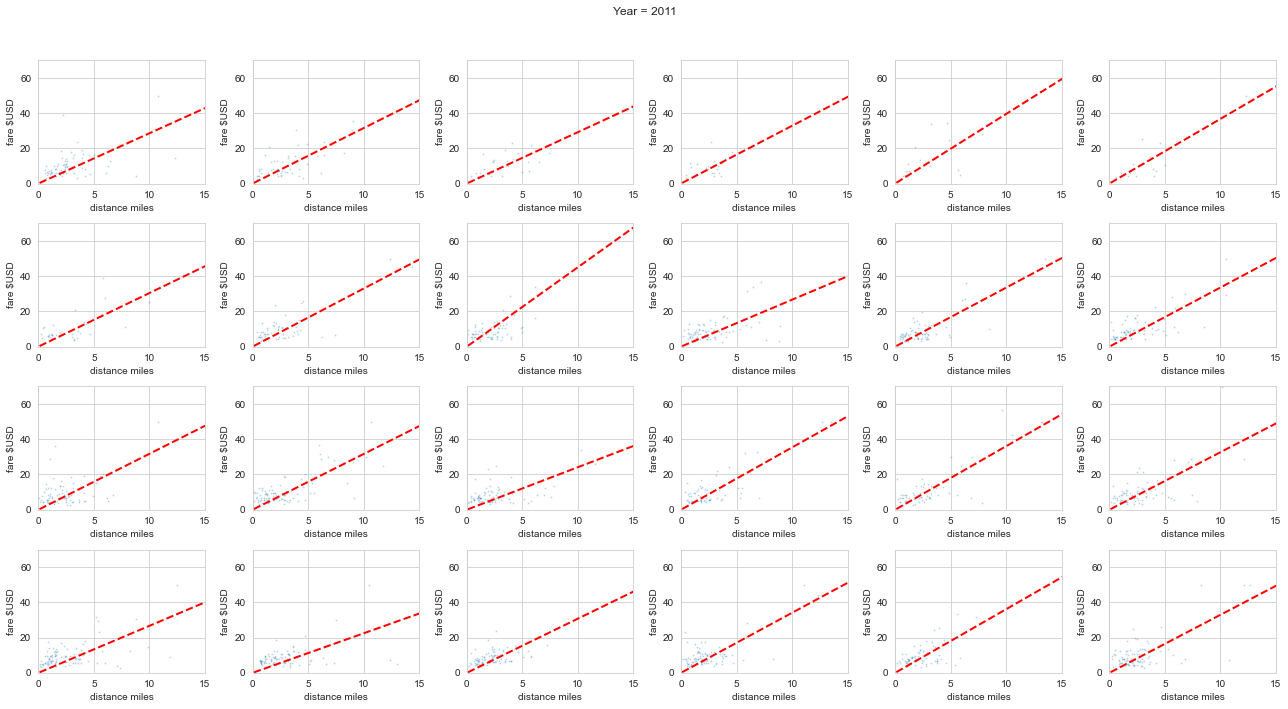

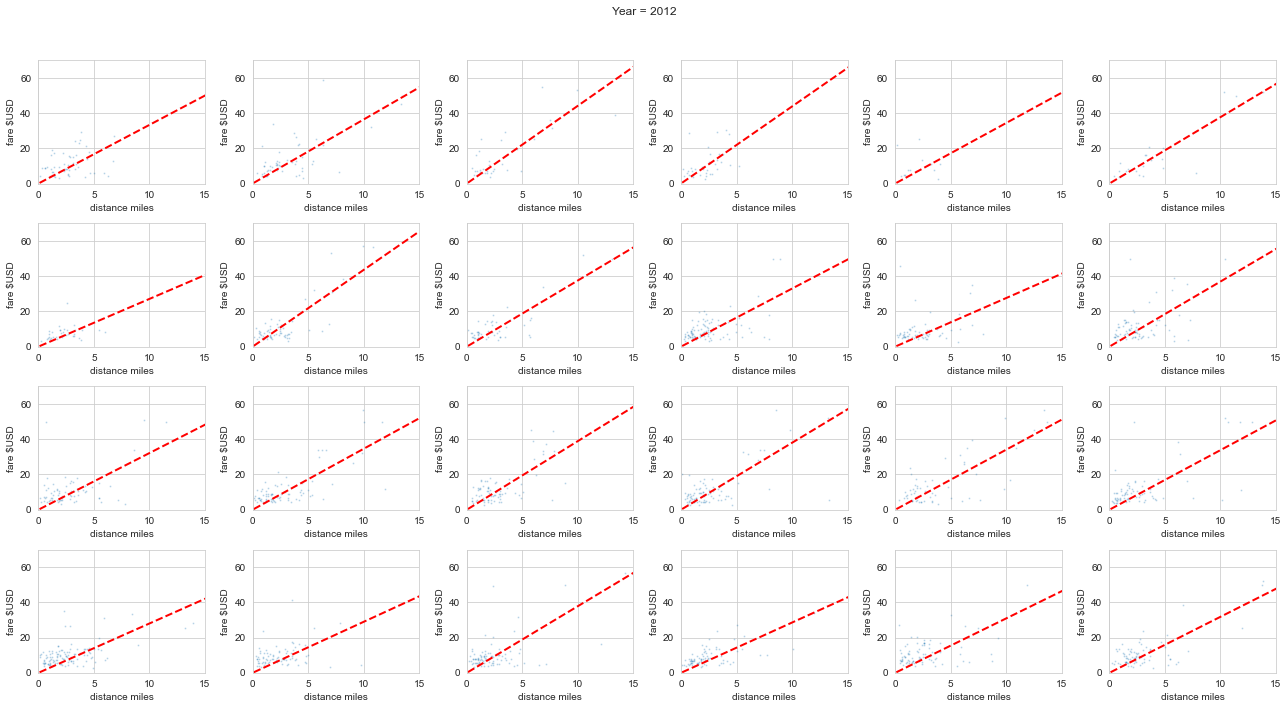

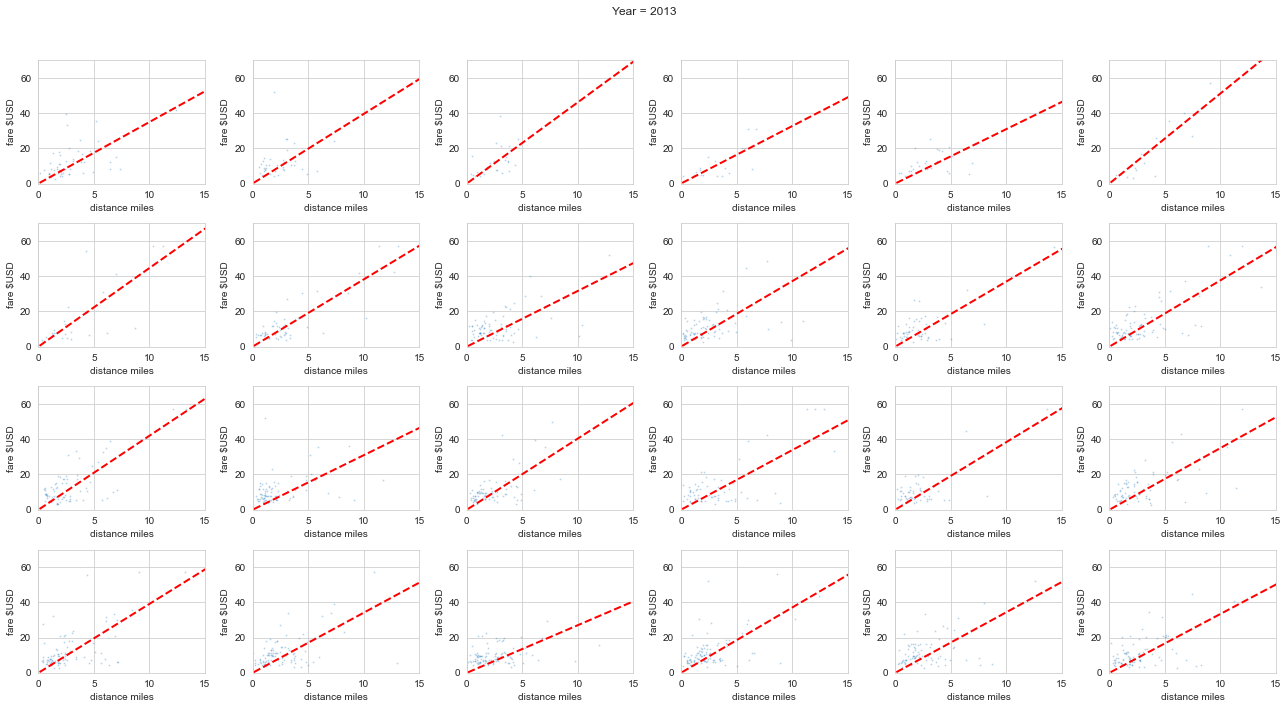

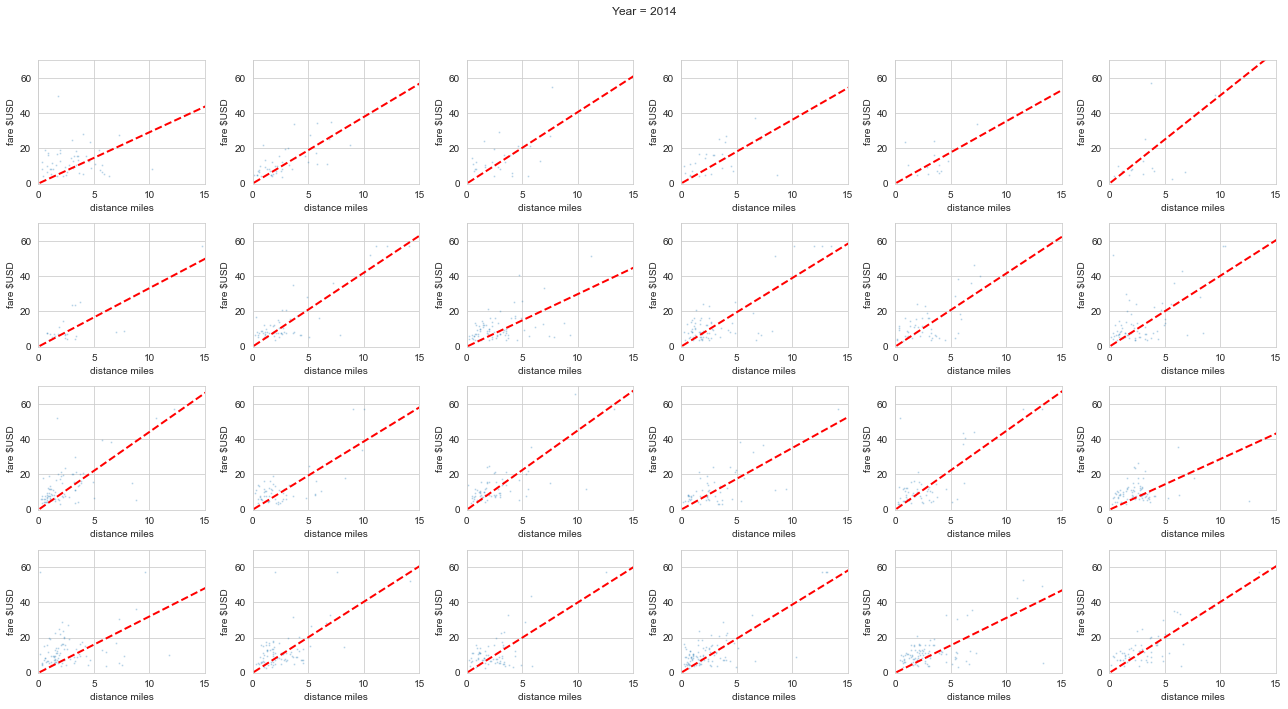

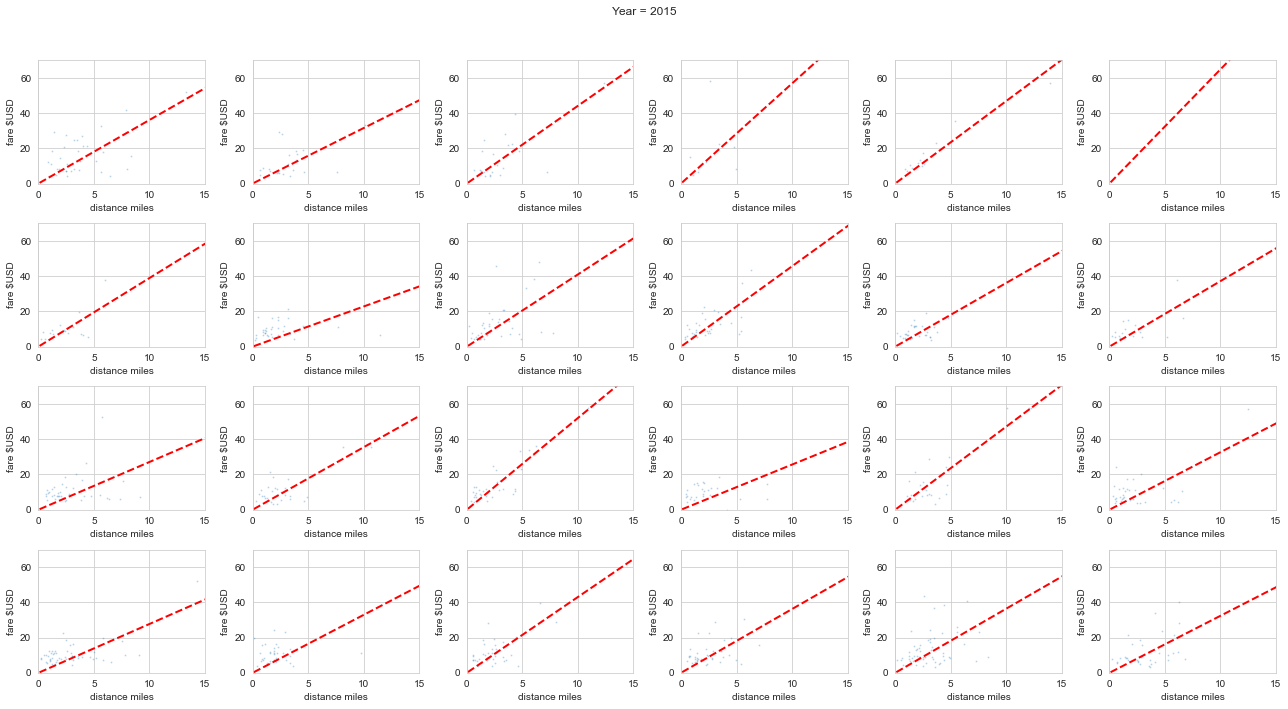

In [122]:
from sklearn.linear_model import LinearRegression

# plot all years
for year in df_train["year"].unique():

    # create figure
    fig, axs = plt.subplots(4, 6, figsize=(18, 10))
    axs = axs.ravel()

    # plot for all hours
    for h in range(24):
        idx = (df_train["distance_miles"] < 15) & (df_train["fare_amount"] < 100) & (df_train["hour"] == h) & \
              (df_train["year"] == year)
        axs[h].scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_amount"], alpha=0.2, s=1)
        axs[h].set_xlabel('distance miles')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 70))

        model = LinearRegression(fit_intercept=False)

        X, y = df_train[idx]["distance_miles"].values.reshape(-1,1), df_train[idx]["fare_amount"].values
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.predict(xx.reshape(-1,1)), '--', c='r', lw=2)

    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);